## Statistical Analysis of Airbnb Pricing Determinants in New York City

In this project, I have taken a dataset from kaggle (link: https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data) in which I will conduct a statistical analysis to identify the main factors that influence Airbnb listing prices in NYC.

## Data Prep & Exploratory Analysis
Firstly, I will load the data, examine its structures, generate statistics for its numerical variables, identify missing values and remove outliers.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [3]:

df = pd.read_csv('AB_NYC_2019.csv')
df.info()
print(df.shape)
print(df.columns)
df.head(8)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


## Cleaning The Data
Getting and cleaning the column information.
- Drops rows with missing values
- Converts column types appropriately
- Checks for duplicate data
- Remove outliers

In [4]:
print(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object


In [5]:

df.dropna(inplace=True)

print('Missing values in each column:')
print(df.isnull().sum())


colConvertStr = ['name', 'host_name', 'last_review']
colConvertCat = ['neighbourhood_group', 'neighbourhood', 'room_type']

for col in colConvertStr:
    df[col] = df[col].astype('string')

for col in colConvertCat:
    df[col] = df[col].astype('category')

df.dtypes
print()
print(f"There are {df.duplicated().sum()} duplicates in the dataset")

# IQR method for price

def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]

for col in ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']:
    df = remove_outliers_iqr(df, col)




Missing values in each column:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

There are 0 duplicates in the dataset


In [6]:
numerical_cols = ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']
print(df[numerical_cols].describe().round(1))
print()

       latitude  longitude    price  minimum_nights  number_of_reviews  \
count   24139.0    24139.0  24139.0         24139.0            24139.0   
mean       40.7      -74.0    120.1             2.8               16.6   
std         0.1        0.0     65.1             1.6               20.5   
min        40.5      -74.2      0.0             1.0                1.0   
25%        40.7      -74.0     70.0             2.0                2.0   
50%        40.7      -74.0    100.0             2.0                8.0   
75%        40.8      -73.9    156.0             3.0               23.0   
max        40.9      -73.7    321.0             8.0               90.0   

       reviews_per_month  calculated_host_listings_count  availability_365  
count            24139.0                         24139.0           24139.0  
mean                 1.0                             1.3              72.2  
std                  1.0                             0.6             106.5  
min                  0.0 

## Visualisation
In this section, we log the price to try and get a normal distribution.

We create a heatmap to check for any numerical correlation with price.

We then create a bar graph to compare categorical values such as neighbourhood group, number of listings and the room type.

We also make a scatterplot to see the effects of the number of reviews on the price.

Afterwards, a boxplot is provided to compare the price depending on the room types.

Lastly, we compare the mean prices in the different neighbourhood group.

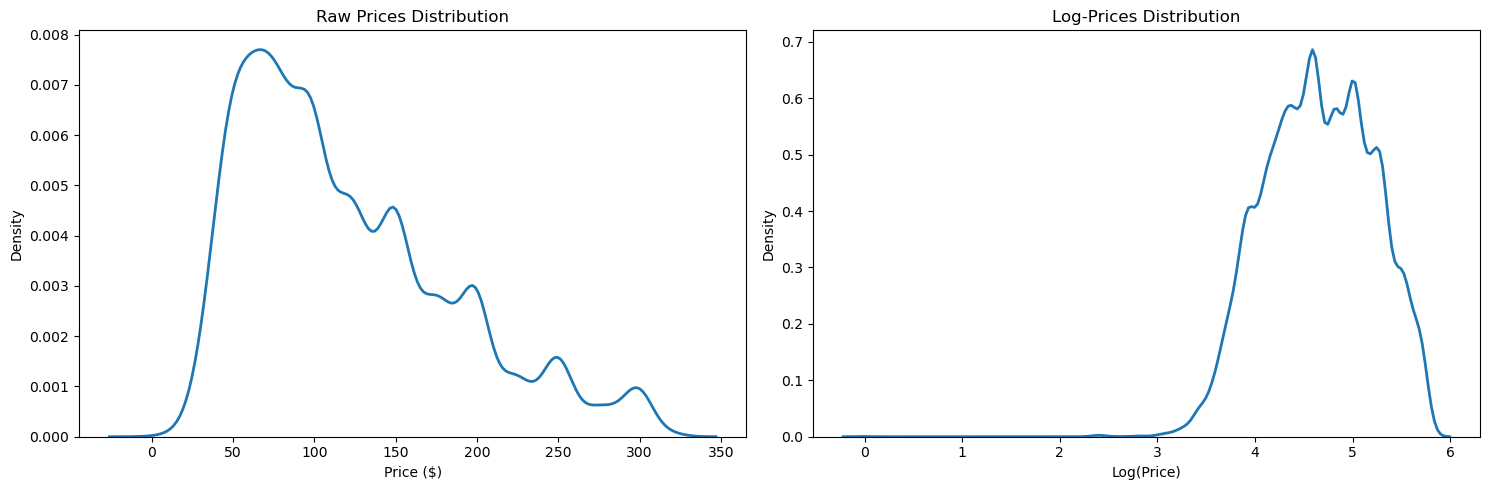

Skewness: -0.17


Text(0.5, 1.0, 'Correlation Matrix of Numerical Features')

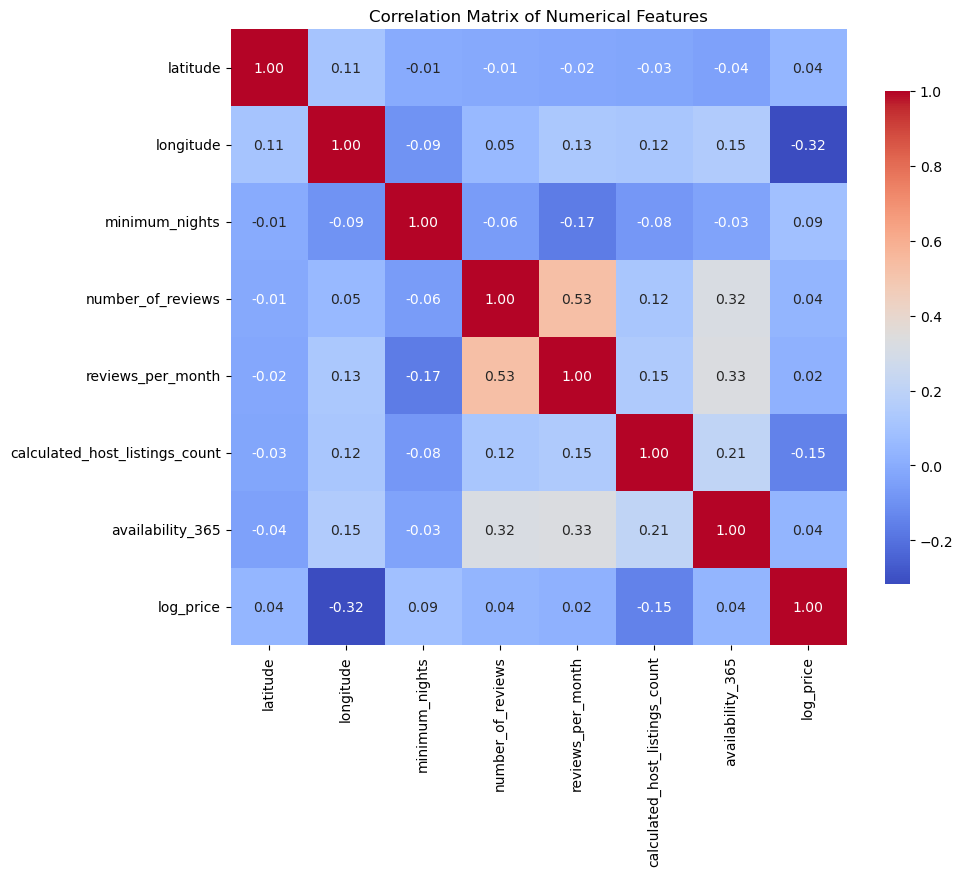

In [7]:
df['log_price'] = np.log1p(df['price'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Raw prices density
sns.kdeplot(df['price'], ax=ax1, linewidth=2)
ax1.set_title('Raw Prices Distribution')
ax1.set_xlabel('Price ($)')

# Log prices density  
sns.kdeplot(df['log_price'], ax=ax2, linewidth=2)
ax2.set_title('Log-Prices Distribution')
ax2.set_xlabel('Log(Price)')

plt.tight_layout()
plt.show()

print(f"Skewness: {df['log_price'].skew():.2f}") #Checking skewness of log transformed price column
numerical_cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'log_price']
correlation_matrix = df[numerical_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Numerical Features')

C:\Users\shame\AppData\Local\Temp\ipykernel_14428\1819992646.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('room_type')['log_price'].mean().round(1))
C:\Users\shame\AppData\Local\Temp\ipykernel_14428\1819992646.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('neighbourhood_group')['log_price'].mean().round(1))


room_type
Entire home/apt    5.0
Private room       4.3
Shared room        4.0
Name: log_price, dtype: float64

neighbourhood_group
Bronx            4.2
Brooklyn         4.6
Manhattan        4.8
Queens           4.4
Staten Island    4.4
Name: log_price, dtype: float64



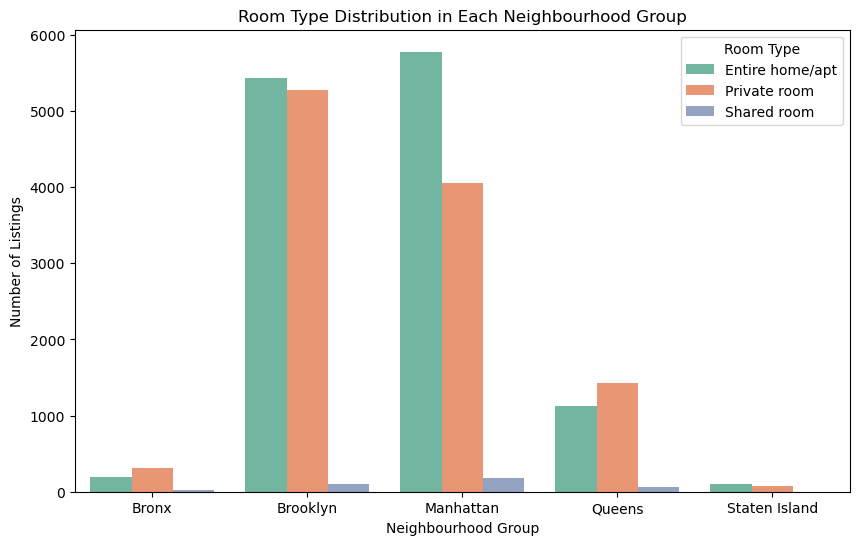

In [8]:
#table of mean log_price of different room types
print(df.groupby('room_type')['log_price'].mean().round(1))
print()
#table of mean log_price of different neighbourhood groups
print(df.groupby('neighbourhood_group')['log_price'].mean().round(1))
print()


#graph of room type in each neighbourhood group
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='neighbourhood_group', hue='room_type', palette='Set2')
plt.title('Room Type Distribution in Each Neighbourhood Group')
plt.xlabel('Neighbourhood Group')
plt.ylabel('Number of Listings')
plt.legend(title='Room Type')
plt.show()



In [9]:
mean_price_brooklyn = df[df['neighbourhood_group'] == 'Brooklyn']['price'].mean().round(1)
print(f"The mean price of listings in Brooklyn is ${mean_price_brooklyn}")

mean_price_manhattan = df[df['neighbourhood_group'] == 'Manhattan']['price'].mean().round(1)
print(f"The mean price of listings in Manhattan is ${mean_price_manhattan}")

mean_price_queens = df[df['neighbourhood_group'] == 'Queens']['price'].mean().round(1)
print(f"The mean price of listings in Queens is ${mean_price_queens}")

mean_price_StatenIsland = df[df['neighbourhood_group'] == 'Staten Island']['price'].mean().round(1)
print(f"The mean price of listings in Staten Island is ${mean_price_StatenIsland}")


The mean price of listings in Brooklyn is $108.8
The mean price of listings in Manhattan is $142.1
The mean price of listings in Queens is $93.1
The mean price of listings in Staten Island is $96.6


Text(0.5, 1.0, 'Scatterplot of Number of Reviews vs log_price')

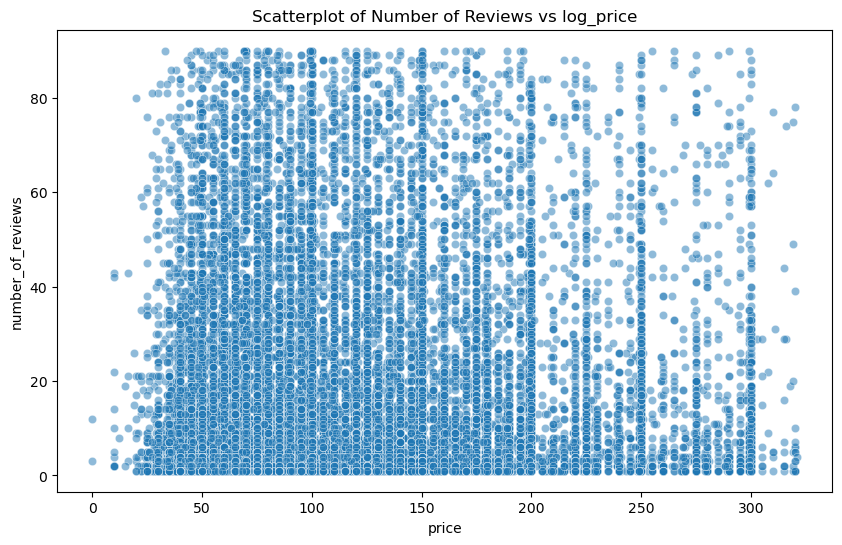

In [10]:
x = df['price']
y = df['number_of_reviews']

plt.figure(figsize=(10,6))
sns.scatterplot(x=x, y=y, alpha=0.5)
plt.title('Scatterplot of Number of Reviews vs log_price')



C:\Users\shame\AppData\Local\Temp\ipykernel_14428\4134185734.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='room_type', y='price', palette='Set2')


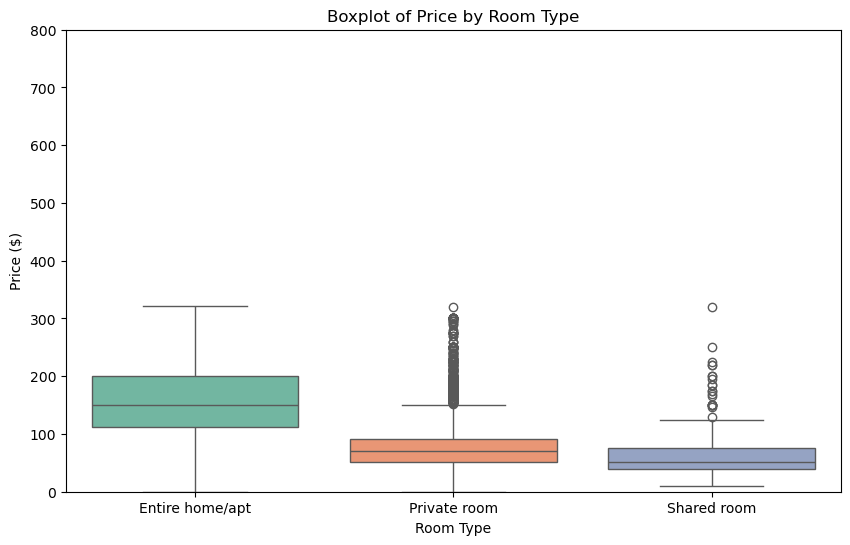

In [11]:
price_cap = 500  # Adjust based on your data
df_no_outliers = df[df['price'] <= price_cap]

data = df[['price', 'room_type']]
plt.figure(figsize=(10,6))
sns.boxplot(data=data, x='room_type', y='price', palette='Set2')
plt.ylim(0, 800)  # Limit y-axis to focus on the main
plt.title('Boxplot of Price by Room Type')
plt.xlabel('Room Type')
plt.ylabel('Price ($)')
plt.show()

## Hypothesis Testing
Hypothesis 1: Manhattan listings are significantly more expensive than Brooklyn listings


In [12]:
manhattan_prices = df[df['neighbourhood_group'] == 'Manhattan']['log_price']
brooklyn_prices = df[df['neighbourhood_group'] == 'Brooklyn']['log_price']

t_stat, p_value = stats.ttest_ind(manhattan_prices, brooklyn_prices, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference between Manhattan and Brooklyn prices")
else:
    print("No significant difference found")

T-statistic: 40.42, P-value: 0.0000
Significant difference between Manhattan and Brooklyn prices


Hypothesis 2: Entire homes/apartments have different prices than private rooms

In [13]:
home_prices = df[df['room_type'] == 'Entire home/apt']['log_price']
private_prices = df[df['room_type'] == 'Private room']['log_price']
t_stat, p_value = stats.ttest_ind(home_prices, private_prices, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Significant difference between Entire home/apt and Private room prices")
else:
    print("No significant difference found")


T-statistic: 136.11, P-value: 0.0000
Significant difference between Entire home/apt and Private room prices


## Linear Regression Modelling

In [ ]:
# Remove rows where price is 0
df = df[df['price'] > 0]

categorical_cols = ['neighbourhood_group', 'neighbourhood', 'room_type']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

X = df_encoded.drop(columns=['log_price', 'name', 'host_name', 'last_review', 'number_of_reviews', 'reviews_per_month', 'price'])
y = df_encoded['log_price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')
print(f'RMSE: {np.sqrt(mse):.2f}')
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")


Mean Squared Error: 0.12
R-squared: 0.59
RMSE: 0.35
Mean Absolute Percentage Error (MAPE): 5.96%



## Statistical Report

Executive summary of key findings
Evidently, I have found that the leading factors that influences price are location and property type. Whereas quantitative data like the number of reviews have little to no influence. Using the categorical facotrs, the linear regression model was able to successfully predict prices with about 59% variability and an average prediction error of 6%.

Methodology description
- I used a series of different graphs and plots: correlation heat map, bar graphs, scatterplots and boxplots to get a good statistical overview of my dataset. 
- I performed two hypothesis tests to check the difference in price between the most expensive neighbourhood group and the difference in price between the home/apartment and private rooms.
- I performed linear regression modelling using the catergorical values to predict prices

Statistical results with interpretation
From correlation map, I found that there were moderate to no correlation between numerical figures, which implies that price is most likely influenced by categorical values such as neighbourhood group, number of reviews and room type. From the bar chart and the list of mean prices, it showed that Brooklyn and Manhattan had a higher number of listings as well as being the most expensive listings, this would make sense as there is a higher supply of listings, those areas are able to have higher prices due to more demand. Within the scatterplot, there was weak to no clear linear relationship between the number of reviews and price, as the wide spread suggested that price varied regardless of number of reviews. From the boxplot, we can gather that entire home/apartments were the most expensive as shown my comparing the median in each, private rooms had the most outliers and shared room had the least price variability. Due to the hypothesis testing, it shows that there is a significant difference between the Manhattan and Brooklyn prices; there is also a significant difference between the prices of entire home/apartments and private rooms.  After using linear regression modelling we gained great figures that suggested 59% variablility in prices and a 6% percentage error from prediction.

Business recommendations based on analysis.
- Prices should not be reduced due to the number of reviews
- Take into account neighbourhood and room type as primary factors that influence price
- Highlight the location during advertisement
- Investors should target properties in Manhattan or Brooklyn
 
Limitations
- Limited features, such as property quality or seasonal trends
- Change in market, this statistic analysis does not take into account inflation
- Excludes factors like business competition

Future Work
- More data regarding anemities
- Consider the review content rather than the quantity
- Analysis of seasonal patterns 
- Include the influence of landmarks and tourist spots
